In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [7]:
df = pd.read_csv('/content/email.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['Category'] = np.where(df['Category'] == 'spam',1,0)


In [10]:
x = df['Message']
y = df['Category']

In [11]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
x_vect = vectorizer.fit_transform(x)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, test_size=0.2, random_state=42)

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_pred = model.predict(x_test)

In [25]:
print(y_pred[:20]) # 1 -> spam, 0 -> not spam

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0]


In [26]:
result = pd.DataFrame({'Message': x_test, 'Predicted Category': y_pred})
print(result.head())

                                             Message  Predicted Category
0    (0, 872)\t0.6978833923693268\n  (0, 183)\t0....                   0
1    (0, 403)\t0.2032259010124094\n  (0, 224)\t0....                   0
2                                      (0, 989)\t1.0                   0
3    (0, 916)\t0.3159771319610771\n  (0, 700)\t0....                   0
4                                      (0, 363)\t1.0                   0


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy  * 100:.2f}%")

Accuracy: 97.40%


In [16]:
cm = confusion_matrix(y_test, y_pred)

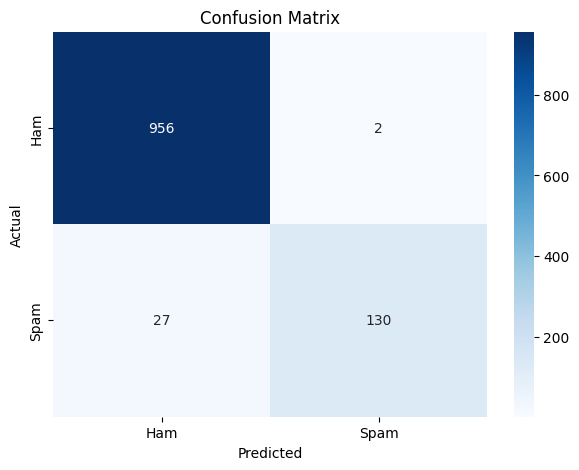

In [17]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

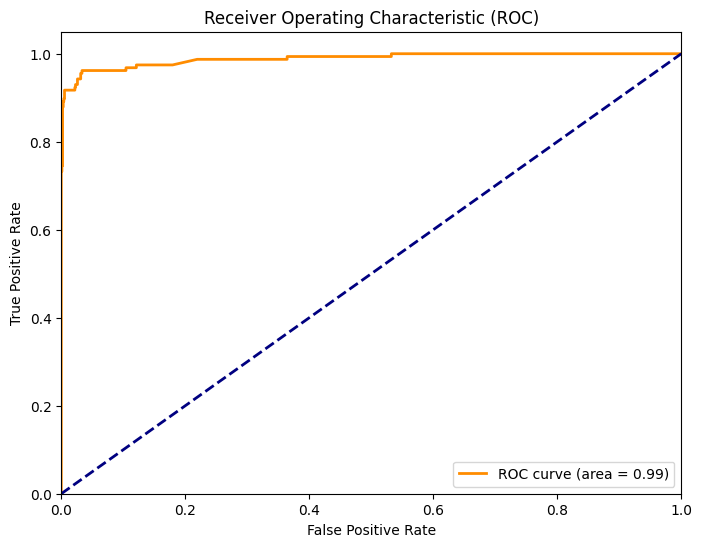

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()